In [27]:
import pandas as pd
import requests
from shapely import wkt
from shapely.geometry import Polygon, LineString
import matplotlib.pyplot as plt
import contextily as cx
import geopandas as gpd
import numpy as np
from tqdm import tqdm
import os
import time
from contextlib import ContextDecorator
from multiprocessing import Process, Queue
import osmnx as ox
import networkx as nx
import spaghetti
import matplotlib.colors
import seaborn as sns
from collections import Counter

In [16]:
df = pd.read_csv("Trees.csv")

/tmp/ipykernel_353/4096184949.py:1: DtypeWarning: Columns (53,59,60,61,62,74,76,77,81,83,85,88,91,95,101,129,147,148,149,168,169,170,186,187,188,189,190,191,192,193) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Trees.csv")


In [17]:
df

,FID,uuid,id,kategori,saerligt_trae,type,element,under_element,ny_dm_element,ny_dm_under_element,...,r_img15,torso_hoejde,torso_omkreds,torso_stamme,torso_sidst_stynet,torso_frekvens_styning,torso_naeste_styning,torso_skaeres_ned_til,torso_bemaerkning,wkb_geometry
0,trae_basis.1,a09bd36c-7864-4f0d-97ce-44ec42eec643,2667,gadetræ,nej,2 Træer,2.2 Specialformede træer,2.2.2 Knudebeskårne træer,Formede træer,Knudebeskåret træ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.539616769956641 55.66532653220765)
1,trae_basis.2,0f738310-ec01-4dea-8164-e0b87b463a5a,2669,gadetræ,nej,2 Træer,2.2 Specialformede træer,2.2.2 Knudebeskårne træer,Formede træer,Knudebeskåret træ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.53965126748055 55.665390541095235)
2,trae_basis.3,938d7fae-9115-4e69-9290-3731e025d208,2676,gadetræ,nej,2 Træer,2.2 Specialformede træer,2.2.2 Knudebeskårne træer,Formede træer,Knudebeskåret træ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.539874779132376 55.66580513321524)
3,trae_basis.4,c05a9944-b17d-49c8-9c01-e46acca66129,2680,gadetræ,nej,2 Træer,2.1 Fuldkronede gade- og torvetræer,2.1.1 Gadetræer,Gade- og allétræer,Allétræ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.540025124286569 55.66608616293556)
4,trae_basis.5,84f73fb1-0783-443f-8caa-2ef7941b2bbb,2681,gadetræ,nej,2 Træer,2.2 Specialformede træer,2.2.2 Knudebeskårne træer,Formede træer,Knudebeskåret træ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.540060893478296 55.666150375833226)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64500,trae_basis.64501,d0cb241f-7a78-4717-9759-3e49b1041e1f,40439,parktræ,nej,2 Træer,2.3 Parktræer,NaN,Park- og naturtræer,Parktræ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.639966830590264 55.650495149618195)
64501,trae_basis.64502,26d4db76-b712-4e5e-8f11-403839b2e5ca,40440,parktræ,nej,2 Træer,2.3 Parktræer,NaN,Park- og naturtræer,Parktræ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.639981798991341 55.65046627705572)
64502,trae_basis.64503,b3fbc5b0-3700-4e34-a484-91f3b9e604f5,40441,parktræ,nej,2 Træer,2.3 Parktræer,NaN,Park- og naturtræer,Parktræ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.64038929927862 55.650082789824744)
64503,trae_basis.64504,7ebc1f8d-faad-4636-9ddd-fdc6770a7078,40452,parktræ,nej,2 Træer,2.3 Parktræer,NaN,Park- og naturtræer,Parktræ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.639912778720891 55.65055383939241)


In [19]:
df["Coordinates"] = gpd.GeoSeries.from_wkt(df["wkb_geometry"])

In [91]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates", crs='EPSG:4326')

In [92]:
gdf

,FID,uuid,id,kategori,saerligt_trae,type,element,under_element,ny_dm_element,ny_dm_under_element,...,torso_hoejde,torso_omkreds,torso_stamme,torso_sidst_stynet,torso_frekvens_styning,torso_naeste_styning,torso_skaeres_ned_til,torso_bemaerkning,wkb_geometry,Coordinates
0,trae_basis.1,a09bd36c-7864-4f0d-97ce-44ec42eec643,2667,gadetræ,nej,2 Træer,2.2 Specialformede træer,2.2.2 Knudebeskårne træer,Formede træer,Knudebeskåret træ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.539616769956641 55.66532653220765),POINT (12.53962 55.66533)
1,trae_basis.2,0f738310-ec01-4dea-8164-e0b87b463a5a,2669,gadetræ,nej,2 Træer,2.2 Specialformede træer,2.2.2 Knudebeskårne træer,Formede træer,Knudebeskåret træ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.53965126748055 55.665390541095235),POINT (12.53965 55.66539)
2,trae_basis.3,938d7fae-9115-4e69-9290-3731e025d208,2676,gadetræ,nej,2 Træer,2.2 Specialformede træer,2.2.2 Knudebeskårne træer,Formede træer,Knudebeskåret træ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.539874779132376 55.66580513321524),POINT (12.53987 55.66581)
3,trae_basis.4,c05a9944-b17d-49c8-9c01-e46acca66129,2680,gadetræ,nej,2 Træer,2.1 Fuldkronede gade- og torvetræer,2.1.1 Gadetræer,Gade- og allétræer,Allétræ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.540025124286569 55.66608616293556),POINT (12.54003 55.66609)
4,trae_basis.5,84f73fb1-0783-443f-8caa-2ef7941b2bbb,2681,gadetræ,nej,2 Træer,2.2 Specialformede træer,2.2.2 Knudebeskårne træer,Formede træer,Knudebeskåret træ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.540060893478296 55.666150375833226),POINT (12.54006 55.66615)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64500,trae_basis.64501,d0cb241f-7a78-4717-9759-3e49b1041e1f,40439,parktræ,nej,2 Træer,2.3 Parktræer,NaN,Park- og naturtræer,Parktræ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.639966830590264 55.650495149618195),POINT (12.63997 55.65050)
64501,trae_basis.64502,26d4db76-b712-4e5e-8f11-403839b2e5ca,40440,parktræ,nej,2 Træer,2.3 Parktræer,NaN,Park- og naturtræer,Parktræ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.639981798991341 55.65046627705572),POINT (12.63998 55.65047)
64502,trae_basis.64503,b3fbc5b0-3700-4e34-a484-91f3b9e604f5,40441,parktræ,nej,2 Træer,2.3 Parktræer,NaN,Park- og naturtræer,Parktræ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.64038929927862 55.650082789824744),POINT (12.64039 55.65008)
64503,trae_basis.64504,7ebc1f8d-faad-4636-9ddd-fdc6770a7078,40452,parktræ,nej,2 Træer,2.3 Parktræer,NaN,Park- og naturtræer,Parktræ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.639912778720891 55.65055383939241),POINT (12.63991 55.65055)


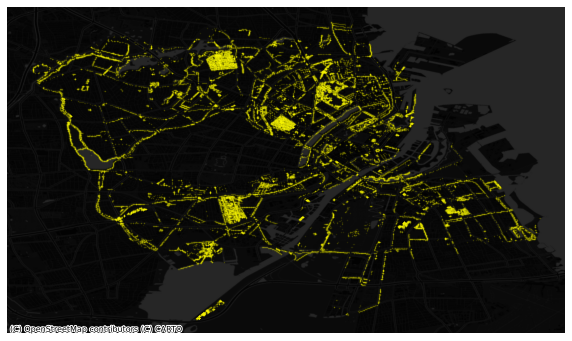

In [93]:
f, ax = plt.subplots(figsize=(10,10))
gdf.plot(
    markersize=0.25,
    c="xkcd:bright yellow",
    alpha=0.1,
    ax=ax)
# cph.plot(ax=ax, column='name', alpha=.2)
cx.add_basemap(source=cx.providers.CartoDB.DarkMatterNoLabels, crs=gdf.crs, ax=ax)
ax.set_axis_off()

In [94]:
geocodes = ['Københavns Kommune', 'Frederiksberg Kommune']
G = ox.graph_from_place(geocodes, network_type='bike')
G = ox.project_graph(G, to_crs='EPSG:25832')

/opt/conda/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/opt/conda/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


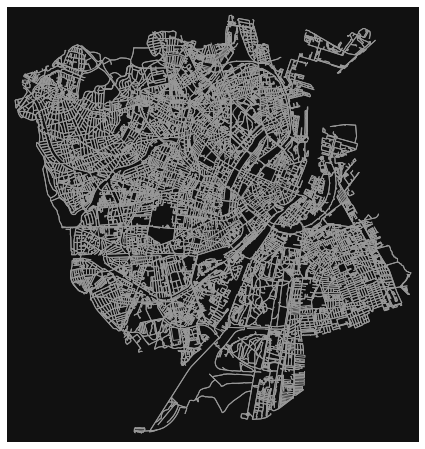

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [95]:
ox.plot_graph(G, node_size=0)

In [96]:
gdf = gdf.to_crs('EPSG:25832')

In [147]:
# map each observation to nearest street and count observations per street
x = gdf.geometry.x.to_list()
y = gdf.geometry.y.to_list()
ne, dist = ox.nearest_edges(G, x, y, return_dist = 'true')

In [148]:
len(ne)

64505

In [149]:
for i in range(len(ne)):
    if dist[i]>10:
        ne[i] = np.nan

In [150]:
ne = [x for x in ne if str(x) != 'nan']

In [151]:
len(ne)

30247

In [140]:
cnt = Counter()
for edge in ne:
    cnt[edge] += 1

In [141]:
# use observation count as edge attribute
nx.set_edge_attributes(G, cnt, 'trees')

In [142]:
# convert graph to geodataframe
_, edges = ox.graph_to_gdfs(G)

In [143]:
# impute 0 on streets with no observations
edges['trees'] = edges['trees'].fillna(0)

Text(0.5, 1.0, 'distribution of trees per street')

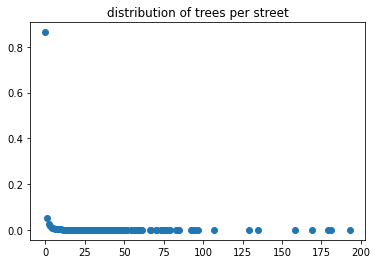

In [144]:
# plot distribution of trees - power law?
x = edges.trees.to_list()
x, y = np.unique(x, return_counts=True)
y = y / np.sum(y)

f, ax = plt.subplots()
ax.scatter(x, y)

ax.set_title('distribution of trees per street')


/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)


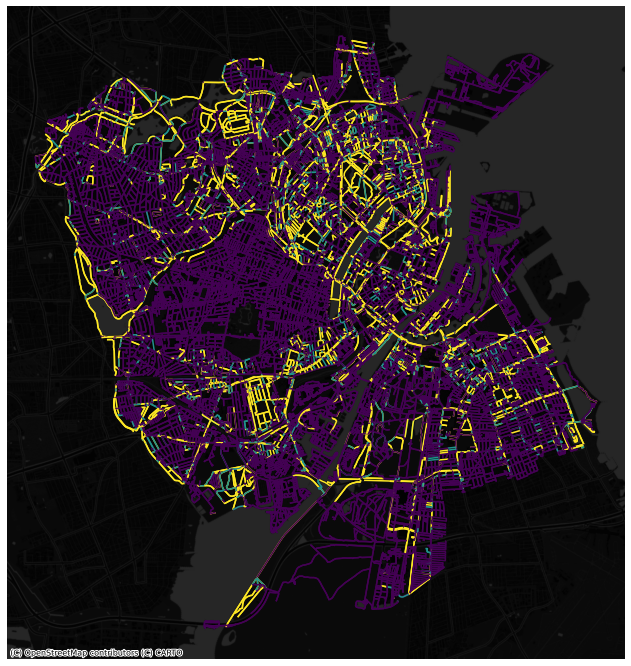

In [145]:
# plot streets with bird activity
f, ax = plt.subplots(figsize=(12,12))
edges.plot(
    column='trees',
    scheme='quantiles',
    k=10,
    ax=ax)
ax.set_axis_off()
cx.add_basemap(
    ax, 
    crs=edges.crs,
    source=cx.providers.CartoDB.DarkMatterNoLabels
)